# DM   BE2    2024-25
## Régression Logistique & Random Forest

### Le data TITANIC   
(toutes les cols ne sont pas forcément présente dans cette BDs)
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- ? boat - Lifeboat (if survived)
- ? body - Body number (if did not survive and body was recovered)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./titanic_train.csv")  
df.head(3)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.head() # 5 données de tête

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail() # # 5 données de queue

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.describe() # résumé des données

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### On enlève des attributs non significatifs

In [9]:
df = df.drop(['Cabin'], axis=1) # On enlève cet attribut (inutile !)

In [10]:
df = df.drop(['Ticket'], axis=1) # On enlève cet attribut (inutile !)

### Ce qui reste

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploration des données : Quelques plots

Distribution de la classe   
**survival** - Survival (0 = No; 1 = Yes)

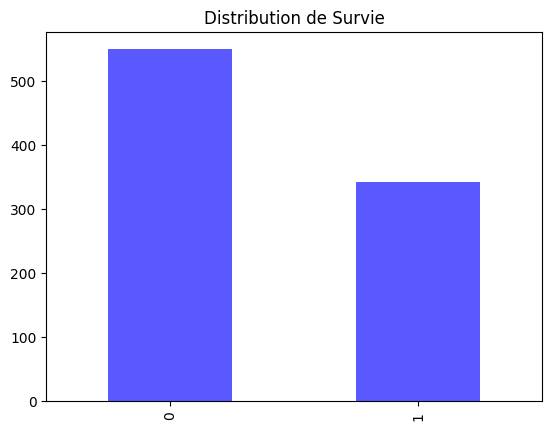

In [16]:
%matplotlib inline
#  Bar Chart de "survie"
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Distribution de Survie")
plt.show()

**embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

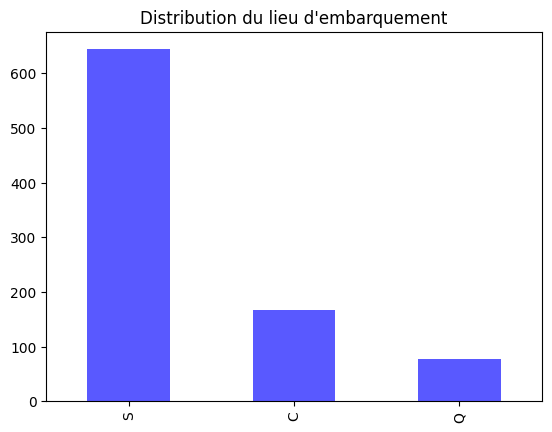

In [17]:
# Comparaison Boarding Location 
df.Embarked.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Distribution du lieu d'embarquement")
plt.show()

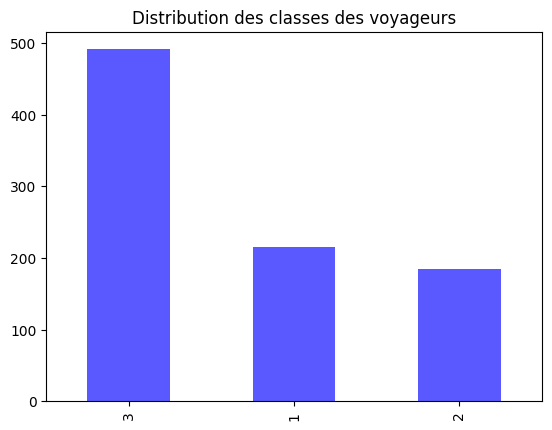

In [18]:
# Passenger Bar Chart
df.Pclass.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Distribution des classes des voyageurs")
plt.show()

### KDE : Kernel Density Estimation de la "Pclass"    
Plot de l'age vs la "classe de la cabine" :   
**class** : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

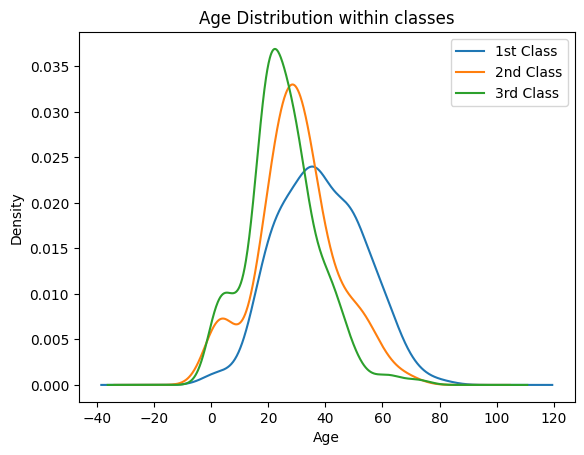

In [19]:
# Distribution Normale de l'age dans les classes
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')

# Nom de l'axe du plot
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# La légende du graphe.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')
plt.show()

###  Suite étude / exploration des données   
**La survie des hommes**

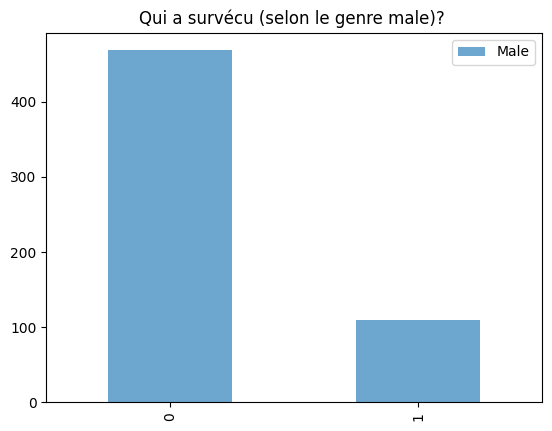

In [20]:
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male', alpha=0.65)
plt.title("Qui a survécu (selon le genre male)? ")
plt.legend(loc='best')
plt.show()

**La survie des femmes**

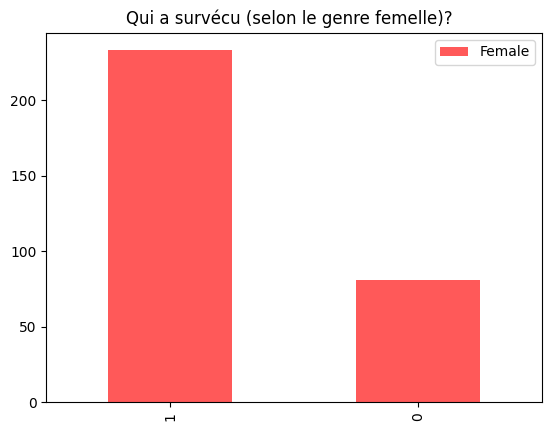

In [21]:
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='red',label='Female', alpha=0.65)
plt.title("Qui a survécu (selon le genre femelle)?  ")
plt.legend(loc='best')
plt.show()

**Distribution de la survie des hommes/femmes**

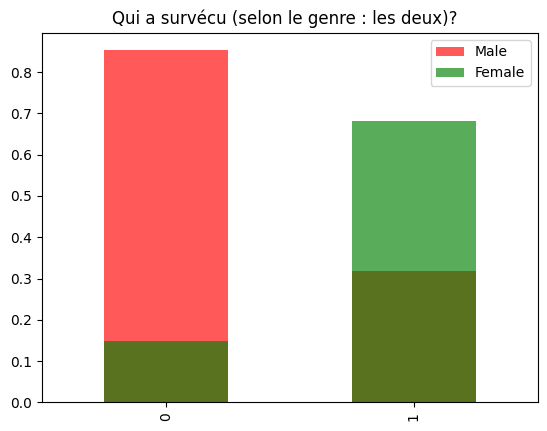

In [22]:
(df.Survived[df.Sex == 'male'].value_counts()/df.Survived.value_counts()).plot(kind='bar', color='red',label='Male', alpha=0.65)
(df.Survived[df.Sex == 'female'].value_counts()/df.Survived.value_counts()).plot(kind='bar', color='green',label='Female', alpha=0.65)
plt.title("Qui a survécu (selon le genre : les deux)?  ")
plt.legend(loc='best')
plt.show()

### Les données manquantes ? 

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

#### Donc "Age" a des zéros. On les éliminera avec "dropnaa"  

In [24]:
# Une version avec age NA remplacé par la moyenne d'Age
df['Age'].fillna(df.Age.mean(), inplace=True)

In [25]:
# Supprimer les données où on a 'NA' (Not available)
df_filtered=df.dropna(how='any')# ,inplace=True

In [26]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


##### N.B. nous avions<font color="red">  891 </font> données

### QQ transformations (en entiers) de données réelles

In [28]:
df_filtered.Age = df_filtered.Age.astype(int)
df_filtered.Fare = df_filtered.Fare.astype(int)
#df_filtered.Survived = df_filtered.Survived.astype(int)
df_filtered.dtypes

/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/143558300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.Age = df_filtered.Age.astype(int)
/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/143558300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.Fare = df_filtered.Fare.astype(int)


PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Fare            int64
Embarked       object
dtype: object

In [29]:
y_train=df_filtered['Survived']

In [30]:
y_train.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


### On supprime qq attribus inutiles : Id, Nom ...

In [31]:
df_filtered.drop('PassengerId', axis=1, inplace=True)
df_filtered.drop('Name', axis=1, inplace=True)

/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/2990602610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('PassengerId', axis=1, inplace=True)
/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/2990602610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('Name', axis=1, inplace=True)


In [32]:
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int64 
 1   Pclass    889 non-null    int64 
 2   Sex       889 non-null    object
 3   Age       889 non-null    int64 
 4   SibSp     889 non-null    int64 
 5   Parch     889 non-null    int64 
 6   Fare      889 non-null    int64 
 7   Embarked  889 non-null    object
dtypes: int64(6), object(2)
memory usage: 62.5+ KB


In [33]:
x_train=df_filtered

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int64 
 1   Pclass    889 non-null    int64 
 2   Sex       889 non-null    object
 3   Age       889 non-null    int64 
 4   SibSp     889 non-null    int64 
 5   Parch     889 non-null    int64 
 6   Fare      889 non-null    int64 
 7   Embarked  889 non-null    object
dtypes: int64(6), object(2)
memory usage: 62.5+ KB


### On enlève la classe (sera dans une autre variable)

In [35]:
df_filtered.drop('Survived', axis=1, inplace=True)
x_train.head()

/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/4020960239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('Survived', axis=1, inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7,S
1,1,female,38,1,0,71,C
2,3,female,26,0,0,7,S
3,1,female,35,1,0,53,S
4,3,male,35,0,0,8,S


#### Transformer le genre en 0/1

In [36]:
#x_train.Sex.replace({1: 'male', 2: 'female'}, inplace=True)
x_train['Sex_male'] = x_train.Sex.map({'female':0, 'male':1})

/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/433549468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Sex_male'] = x_train.Sex.map({'female':0, 'male':1})


In [37]:
#x_train.Sex.replace({1: 'male', 2: 'female'}, inplace=True)
x_train.Sex.replace(['male', 'female'], [1, 0], inplace=True)
x_train.head()

/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/834813350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.Sex.replace(['male', 'female'], [1, 0], inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,1,22,1,0,7,S,1
1,1,0,38,1,0,71,C,0
2,3,0,26,0,0,7,S,0
3,1,0,35,1,0,53,S,0
4,3,1,35,0,0,8,S,1


In [38]:
x_train.drop('Sex_male', axis=1, inplace=True)

/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/1020882582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop('Sex_male', axis=1, inplace=True)


###  Où en est-on ?

In [39]:
x_train.head()
x_train.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,2,1,27,0,0,13,S
887,1,0,19,0,0,30,S
888,3,0,29,1,2,23,S
889,1,1,26,0,0,30,C
890,3,1,32,0,0,7,Q


#### Transformation de l'embarquement (en 1,2,3)

In [40]:
x_train.Embarked.replace(['S', 'C','Q'], [1, 2, 3], inplace=True)
x_train.head()

/var/folders/7r/f9mmc2nn3zx36t4g0mhs044c0000gn/T/ipykernel_58849/1851002154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.Embarked.replace(['S', 'C','Q'], [1, 2, 3], inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,1
1,1,0,38,1,0,71,2
2,3,0,26,0,0,7,1
3,1,0,35,1,0,53,1
4,3,1,35,0,0,8,1


### Les données transformées : prêtes pour l'analyse.

## Il y a un fichier de test mais je découpe qd mm (pour tester des méthodes sur place)

In [41]:
df_x_org=x_train.copy(deep=True)
df_y_org=y_train.copy(deep=True)

In [42]:
# Moi : je découpe
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30)

In [43]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=100)

# fit the model with data
logreg.fit(x_train, y_train)

LogisticRegression()

In [44]:
#lr.fit(trainTRN, trainTRG)
lr_valid_pred = logreg.predict(x_test)

In [45]:
lr_valid_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

### Mesures de justesse : 

In [46]:
lr_accuracy = accuracy_score(y_test, lr_valid_pred)
print(" lr_accuracy = " + str(lr_accuracy))

 lr_accuracy = 0.797752808988764


### N.B. : si on remplace l'age Nul par la moyenne d'Age, on aura 0.85

### Le rapport (sur le modèle)

In [47]:
from sklearn.metrics import classification_report
target_names=['S', 'N']

# Mettre tjs print pour interprétert les \n
print(classification_report(y_test, lr_valid_pred,target_names=target_names))

              precision    recall  f1-score   support

           S       0.84      0.84      0.84       170
           N       0.72      0.72      0.72        97

    accuracy                           0.80       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



### Quelques (jolis ?) plots de la régression Logistique 

<Axes: xlabel='Pclass'>

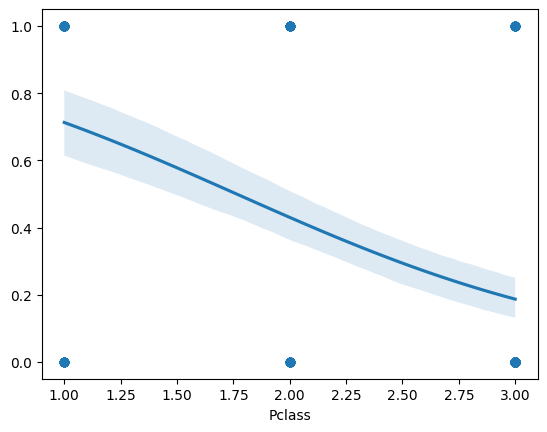

In [48]:

import seaborn as sns
#sns.regplot(x='Pclass', y=ypred, data=df_filtered, logistic=True)
sns.regplot(x='Pclass', y=lr_valid_pred, data=x_test, logistic=True)


<Axes: xlabel='Age'>

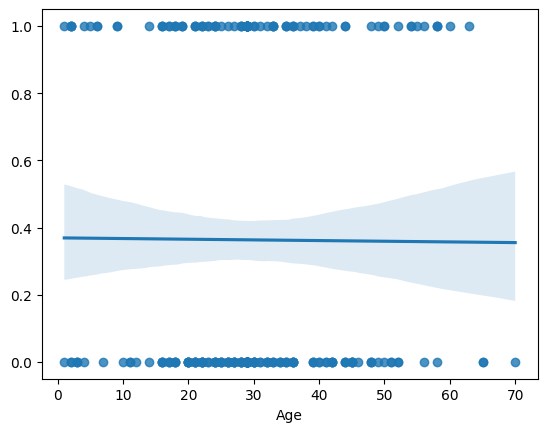

In [49]:
sns.regplot(x='Age', y=lr_valid_pred, data=x_test, logistic=True)


<Axes: xlabel='Sex'>

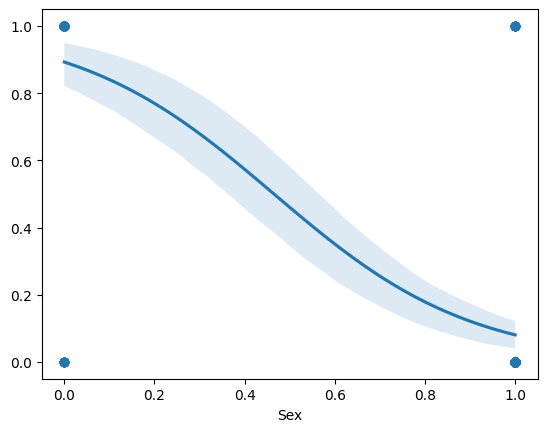

In [50]:
sns.regplot(x='Sex', y=lr_valid_pred, data=x_test, logistic=True)

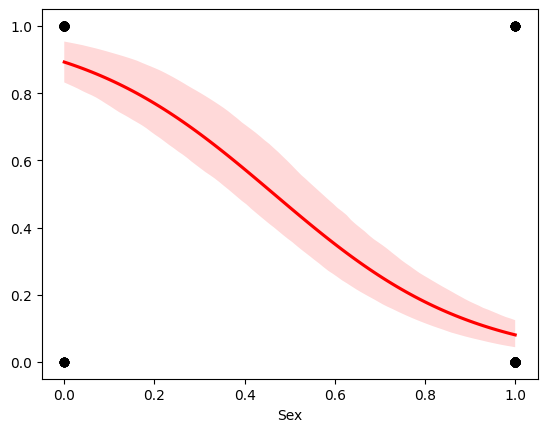

In [51]:

ax = sns.regplot(x="Sex", y=lr_valid_pred, data=x_test, logistic=True,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.show() # Inutile sous jupyter !

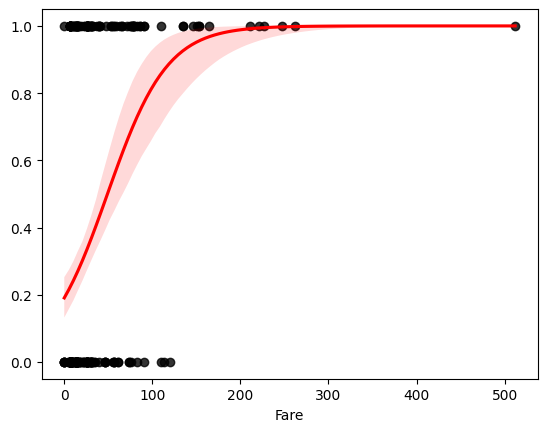

In [52]:
ax = sns.regplot(x="Fare", y=lr_valid_pred, data=x_test, logistic=True,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

# Inutile ici : plt.show() 

In [53]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
162,3,1,26,0,0,7,1
804,3,1,27,0,0,6,1
605,3,1,36,1,0,15,1
309,1,0,30,0,0,56,2
504,1,0,16,0,0,86,1


### Courbe de tout en mm temps  mis pas bien car l'échelle n'est pas la mm 

Pclass  sera de couleur  red
Sex  sera de couleur  green
Age  sera de couleur  yellow
SibSp  sera de couleur  brown
Parch  sera de couleur  gray
Fare  sera de couleur  blue
Embarked  sera de couleur  gold


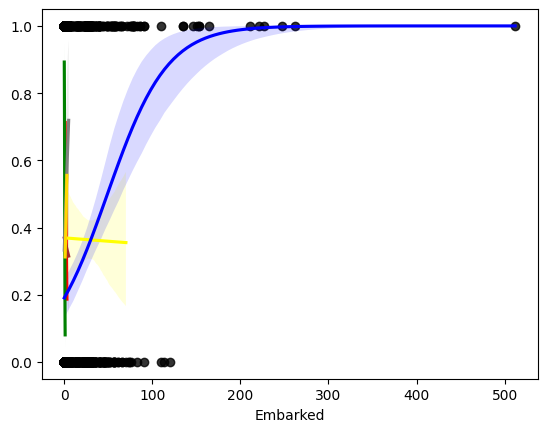

In [54]:
couls=['red', 'green', 'yellow', 'brown', 'gray', 'blue', 'gold']
for i,ele in enumerate(list(x_test.columns)) :
    print(ele, " sera de couleur ", couls[i])
    sns.regplot(x=ele, y=lr_valid_pred, data=x_test, logistic=True, scatter_kws={"color": "black"},line_kws={"color": couls[i]})

## Application de Random Forest

In [55]:
x_train=df_x_org
y_train=df_y_org

In [56]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestRegressor

# Building and fitting my_forest
forest = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)
my_forest = forest.fit(x_train, y_train)

# Print the score of the fitted random forest
print(my_forest.score(x_train, y_train))


0.835178746318168


### Utilisation du fichier de test   
### Avec l'analyse RF

In [57]:
test = pd.read_csv("./titanic_test.csv") 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Adaptation aux traitement ci-dessus.

In [58]:
test.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [59]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [61]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [62]:
test=test.dropna(how='any')# ,inplace=True

In [63]:
test.Age = test.Age.astype(int)
test.Fare = test.Fare.astype(int)
#df_filtered.Survived = df_filtered.Survived.astype(int)
test.dtypes

Pclass       int64
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked    object
dtype: object

In [64]:
test.Sex.replace(['male', 'female'], [1, 0], inplace=True)
test.Embarked.replace(['S', 'C','Q'], [1, 2, 3], inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7,3
1,3,0,47,1,0,7,1
2,2,1,62,0,0,9,3
3,3,1,27,0,0,8,1
4,3,0,22,1,1,12,1


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    331 non-null    int64
 1   Sex       331 non-null    int64
 2   Age       331 non-null    int64
 3   SibSp     331 non-null    int64
 4   Parch     331 non-null    int64
 5   Fare      331 non-null    int64
 6   Embarked  331 non-null    int64
dtypes: int64(7)
memory usage: 20.7 KB


In [66]:
test['Age'].fillna(test.Age.mean(), inplace=True)
test['Fare'].fillna(test.Fare.mean(), inplace=True)
test.round({'Fare': 0})

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7,3
1,3,0,47,1,0,7,1
2,2,1,62,0,0,9,3
3,3,1,27,0,0,8,1
4,3,0,22,1,1,12,1
...,...,...,...,...,...,...,...
409,3,0,3,1,1,13,1
411,1,0,37,1,0,90,3
412,3,0,28,0,0,7,1
414,1,0,39,0,0,108,2


In [67]:
ypred=my_forest.predict(test)

In [68]:
ypred[:10]

array([0.        , 0.06      , 0.43      , 0.7690638 , 0.62      ,
       0.10233333, 0.29374652, 0.01      , 0.74028571, 0.05      ])

In [69]:
test['Survived'] = ypred

In [70]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34,0,0,7,3,0.000000
1,3,0,47,1,0,7,1,0.060000
2,2,1,62,0,0,9,3,0.430000
3,3,1,27,0,0,8,1,0.769064
4,3,0,22,1,1,12,1,0.620000


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    int64  
 2   Age       331 non-null    int64  
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    int64  
 6   Embarked  331 non-null    int64  
 7   Survived  331 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 23.3 KB


In [72]:
# Convertir 'Survived' en int
test.Survived = test.Survived.astype(int)

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    331 non-null    int64
 1   Sex       331 non-null    int64
 2   Age       331 non-null    int64
 3   SibSp     331 non-null    int64
 4   Parch     331 non-null    int64
 5   Fare      331 non-null    int64
 6   Embarked  331 non-null    int64
 7   Survived  331 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


In [74]:
test.to_csv('out1.csv')

In [75]:
ypred=my_forest.predict(x_train)

In [76]:
x_train.shape

(889, 7)

In [77]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [78]:
### Il faut convertir les réels
ypred[:20]

array([0.21433333, 0.99      , 0.92      , 1.        , 0.        ,
       0.03016741, 0.062     , 0.19      , 0.835     , 1.        ,
       0.85      , 0.86      , 0.04071429, 0.03      , 0.245     ,
       0.92      , 0.06      , 0.59      , 0.4       , 0.89450444])

In [79]:
len(ypred)

889

In [80]:
# Il faut convertir les sorties en int 
ypred1=[int(v) for v in ypred]
ypred1[:10]
    

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

## La justesse du modèle RF

In [81]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, ypred1)) # moi ; c=was ypred avec des réells qui fait erreur

0.7232845894263217


 ### Choix méthode Random Forest avec des paramètres différents

In [82]:
# Import  de `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# on veut les vars Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked 
#features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
features_forest = x_train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
print(features_forest.shape)

target=y_train  
# Création du modèle
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

# Le  score du modèle 
print(my_forest.score(features_forest, target))

# Calcul des predictions sur les données de  test set  
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
print(len(pred_forest))

(889, 7)
0.9358830146231721
331
